# back propagation using numpy

- we have some digits and we want to classify them 

## imports 

In [1]:
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits

C:\Users\youse\anaconda3\envs\dllabs\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
len(digits), type(digits)

(7, sklearn.utils.Bunch)

In [4]:
len(digits.images)

1797

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'image label: 4')

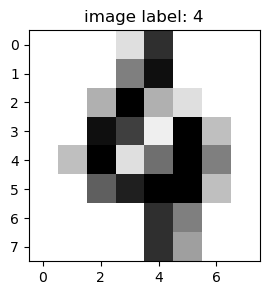

In [6]:
sample = 100
plt.figure(figsize=(3,3))
plt.imshow(digits.images[sample],cmap = plt.cm.gray_r,interpolation='nearest')
plt.title(f"image label: {digits.target[sample]}",)

## preprocessing 
- normalization (scaling)
    - we love all the features to be scaled, because they make the NN learns faster when all features (inputs) have the same range (check andrew)
    - we make them from 0 to 1 or from -1 to 1 or whatever condined range 
    - this improves the accuracy by 1 or 2%
- train/test split 

In [7]:
type(digits.data)

numpy.ndarray

In [8]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
# extract the data and targets (X and Y)
data = np.asarray(digits.data, dtype="float32")
target = np.asarray(digits.target, dtype="int32")

In [9]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], dtype=float32)

In [10]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# split them into train and test set (we didnt use validation)
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.15,random_state=37)

- train test split run using random number generator, so that whenever we run it we get different examples in the train and test set each time (random spliting)
- by setting the random state to be a specific number, we get the same split each time 

In [12]:
X_train.shape,X_test.shape

((1527, 64), (270, 64))

- meaning we have 1527 training set images (samples), each image is 64 pixels (8x8 notice from above)
- we have 270 samples for testing 

In [13]:
y_train.shape,y_test.shape

((1527,), (270,))

## normalize (scale the features)

In [14]:
scalar = preprocessing.StandardScaler()
# mean = 0, standard dviation = 1
X_train = scalar.fit_transform(X_train) # we estimate the mean and standard deviation of the training set and we scale using them (we subtract the data by the mean and divide by the standard deviation)
X_test = scalar.transform(X_test) # we scale the test set data using the mean and variance of the training set!! (thats why we used tramsform and not fit transform) because we can never estimate anything from the test set 

- the range of the data now will be between -1 to 1

## numpy implementation 

## a) logistic regression
more precisly we will implement softmax regression algorithm (for multicalss classification)
- $ y = softmax(W x + b) $

objectives 
- implement simple forward network with no hidden layers
- carry out forward prop and calculate the accuracy 
- carry out back prop and train the parameters

In [15]:
y_train.min(),y_train.max()

(0, 9)

- -we preferably want to apply **one hot encoding** in multiclass problems 
- notice the function below np.eye(n) produces the identity matrix of size n -10 in this example-
- notice all rows can be considered as all the possible one-hot encodings for 10 digits 
    - the first row has 1 in the first bit and 0s in the rest
    - the last row has 1 in the last digit and 0s in the rest
    - and so on 

In [16]:
np.eye(10)    

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

- we will use the value we want to convert as an index

In [17]:
np.eye(10)[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.eye(10)[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [19]:
def one_hot(n_classes,y):
    return np.eye(n_classes)[y]

In [20]:
one_hot(10,2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
# we can even apply them to a vector, later we will apply the target column
y = [0,2,5,7,9]
one_hot(10,y)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## the softmax function 

In [22]:
def softmax(z): # Z will be the logits (wx+b)
    z = np.exp(z)
    return z/z.sum(axis = 1,keepdims=True) # axis 0 means vertically and 1 means horizontally

In [23]:
softmax([[10,2,-3]]) #input must be 2D array (because we use axis in the funtion)

array([[9.99662391e-01, 3.35349373e-04, 2.25956630e-06]])

-  we can handle both single array (single example) and 2D array (multiple examples) using axis = -1 
- if the input is 1D array (we only have 0 so index -1 will give us axis 0)
- in 2D array (we have options 0 and 1 so index will be 1) which means horizontally

- we can omit it totally and it will be 0 in both cases (will work on 1D and will work vertically in 2D)

In [24]:
# tips to understand axis more 
X = np.array([0,2,3])
X.shape 

(3,)

- in 1D array when only have axis 0, which means we will sum on the 3 above (rows)

In [25]:
X = np.array([[1,2,3],[1,2,3]])
X,X.shape

(array([[1, 2, 3],
        [1, 2, 3]]),
 (2, 3))

In [26]:
X.sum()

12

In [27]:
X.sum(axis = 0)

array([2, 4, 6])

In [28]:
X.sum(axis = 1)

array([6, 6])

- here in 2D we have axis 0 means we will sum on the 2 (sum the 2 rows or sum vertically)
- if we say axis = 1 (axis indexes shape) means we will sum on 3 (sum the 3 columns or sum horizontally)

In [29]:
def softmax(z): # Z will be the logits (wx+b)
    z = np.exp(z)
    return z/z.sum(axis = -1,keepdims=True) # axis 0 means vertically and 1 means horizontally

In [30]:
softmax([10,2,-3])

array([9.99662391e-01, 3.35349373e-04, 2.25956630e-06])

In [31]:
out = softmax([[10,2,-3],[-1,5,-20]])
out

array([[9.99662391e-01, 3.35349373e-04, 2.25956630e-06],
       [2.47262316e-03, 9.97527377e-01, 1.38536042e-11]])

notice the outputs are probabilityes , if we sum horizontally we will get 1 for each row

In [32]:
out.sum(axis = 1)

array([1., 1.])

## implement loss function

In [33]:
# tips
X = np.array([0,2,3])
print(X.shape)
X = np.atleast_2d(X)
print(X.shape)

(3,)
(1, 3)


In [34]:
# the loss function
def categoricalcrossentropy(y_true,y_prid):
    y_true = np.asarray(y_true) # to handle different types of arary-like inputs
    y_prid = np.asarray(y_prid)
    
    y_prid, y_true = np.atleast_2d(y_prid),np.atleast_2d(y_true) # to also handle single pattern inputs
    
    epslon = 0.000001 #to avoid log(0) which is undefined
    y_prid += epslon
    y_prid = np.log(y_prid) * -1
    return np.multiply(y_prid,y_true).sum(axis = -1).mean()

In [35]:
y = [1,0,0]
y_cap = [0.99,0.01,0]
categoricalcrossentropy(y,y_cap)

0.010049325753001472

- notice the loss is so close to 0 as the corresponding probability to y here is 0.99 :)

In [36]:
y = [1,0,0]
y_cap = [0.01,0.99,0]
categoricalcrossentropy(y,y_cap)

4.6050701909877585

- 4 is a big loss don't worry

In [37]:
y = [[1,0,0],[0,1,0],[0,0,1]]
y_cap = [[1,0,0],[0,0.99,0.01],[0,0,1]]
categoricalcrossentropy(y,y_cap)

0.0033491085846672117

In [38]:
(-np.log(1)-np.log(0.99)-np.log(1))/3

0.00335011195116715

## logistic regression (softmax regression algorithm)

In [39]:
np.random.uniform(size=(2,3),low = -0.1,high = 0.1)

array([[ 0.05386665, -0.09175928, -0.01787198],
       [ 0.03880935,  0.07901998,  0.06879616]])

In [40]:
np.dot([[1,2],[3,4]],[[5,6],[7,8]]) + [2,3]

array([[21, 25],
       [45, 53]])

In [41]:
y = np.array([1,2,3,4,5,6,7,8,9,10])
y_cap = np.array([1,2,3,4,5,6,0,9,9,0])
(y == y_cap).mean()

0.7

In [42]:
class logistic_regression_layer:
    def __init__(self,input_size,output_size): #initialize the weights to be random numbers sampled from uniform distribution and to be between -1 and 1
        self.w = np.random.uniform(size=(input_size,output_size),low = -0.1,high = 0.1)
        self.b = np.random.uniform(size=output_size,low = -0.1,high = 0.1)
        self.output_size = output_size #self refers to the instance in hand
        
    def forward(self,X): # this outputs the y_prid vector of all layer units
        z = np.dot(X,self.w) + self.b
        return softmax(z)
    
    def predict(self,X): # this gets the corresponding class from y-prid vector
        y_prid = self.forward(X) #y_prid here is a vector for each patter
        return np.argmax(y_prid,axis = -1)
    
    def loss(self,X,y):
        y_prid = self.forward(X) #carry out forward prop and get y_prid as array of probabilities
        y = one_hot(self.output_size, y) #convert y to be 1-hot encoded
        return categoricalcrossentropy(y,y_prid)
    
    def accuracy(self,X,y):
        y_prid = self.predict(X) #y_prid here will be scalar for each pattern (corresponding to the predicted class)
        return (y == y_prid).mean()

    def gradient(self,x,y):
        y_prid = self.forward(x)
        dloss_dy_cap = y_prid - one_hot(self.output_size,y)
        grad_w = np.outer(x,dloss_dy_cap)
        grad_b = dloss_dy_cap
        gradients = {"w":grad_w,"b":grad_b}
        return gradients
    
    def train(self,x,y,learning_rate):
        grads = self.gradient(x,y)
        self.w = self.w - learning_rate * grads["w"]
        self.b = self.b - learning_rate * grads["b"]
    

## build a model

In [43]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
n_features = X_train.shape[1] # correspondes to the output of the layer 
n_classes = len(np.unique(y_train))
# instanciate a layer 
layer = logistic_regression_layer(n_features,n_classes)

print("evaluate the untrained model:")
train_loss = layer.loss(X_train,y_train)
train_accuracy = layer.accuracy(X_train,y_train)
test_accuracy = layer.accuracy(X_test,y_test)
print(f"train loss: %0.4f , train accuracy: %0.3f , test accuracy: %0.3f "% (train_loss,train_accuracy,test_accuracy))

evaluate the untrained model:
train loss: 2.4618 , train accuracy: 0.105 , test accuracy: 0.122 


In [45]:
def plot_prediction(model,sample_index = 0,classes = range(10)):
    fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    # ax0 is for plotting the test
    x = [X_test[sample_index]]
    x = scalar.inverse_transform(x) # denormalize it to print it
    ax0.imshow(x.reshape(8,8),cmap = plt.cm.gray_r,interpolation='nearest')
    ax0.set_title("True image label: %d"%(y_test[sample_index]))
    
    y = one_hot(len(classes), y_test[sample_index])
    ax1.bar(classes,y,label="true")
    y_prid = model.forward(X_test[sample_index])
    #print(y_prid.dtype)
    ax1.bar(classes,y_prid,label='prediction',color='red')
    
    prediction = model.predict(X_test[sample_index])
    #print(prediction)
    ax1.set_title("output probabilities: prediction %d"%(prediction))
    ax1.legend()
    ax1.set_xticks(classes)
    ax1.set_xlabel("digit calsses")

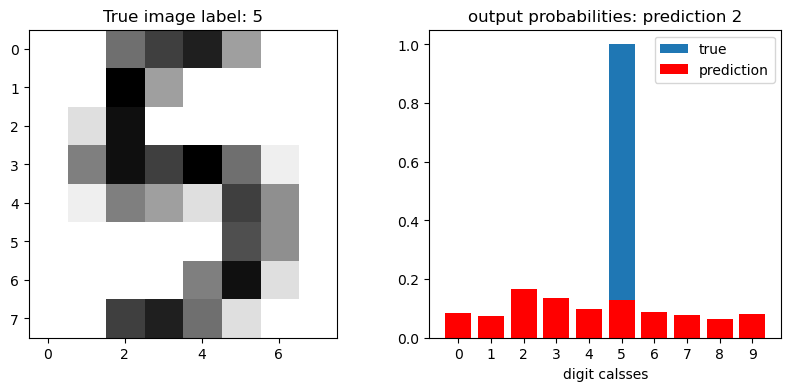

In [46]:
plot_prediction(layer,6)

## train

In [47]:
#train for 1 epoch (we will go through the training data 1 time)
learning_rate = 0.01

for i, (x,y) in enumerate(zip(X_train,y_train)):
    layer.train(x,y,learning_rate) #train with single pattern
    # print the state every 100 example
    if i % 100 == 0:
        train_loss = layer.loss(X_train,y_train)
        train_accuracy = layer.accuracy(X_train,y_train)
        test_accuracy = layer.accuracy(X_test,y_test)
        print(f"train loss: %0.4f , train accuracy: %0.3f , test accuracy: %0.3f "% (train_loss,train_accuracy,test_accuracy))

train loss: 2.4392 , train accuracy: 0.122 , test accuracy: 0.137 
train loss: 1.3592 , train accuracy: 0.703 , test accuracy: 0.737 
train loss: 0.8775 , train accuracy: 0.855 , test accuracy: 0.878 
train loss: 0.6502 , train accuracy: 0.898 , test accuracy: 0.915 
train loss: 0.5429 , train accuracy: 0.904 , test accuracy: 0.915 
train loss: 0.4680 , train accuracy: 0.919 , test accuracy: 0.926 
train loss: 0.4054 , train accuracy: 0.927 , test accuracy: 0.933 
train loss: 0.3698 , train accuracy: 0.931 , test accuracy: 0.948 
train loss: 0.3488 , train accuracy: 0.933 , test accuracy: 0.956 
train loss: 0.3236 , train accuracy: 0.941 , test accuracy: 0.952 
train loss: 0.3042 , train accuracy: 0.946 , test accuracy: 0.952 
train loss: 0.2865 , train accuracy: 0.948 , test accuracy: 0.956 
train loss: 0.2746 , train accuracy: 0.943 , test accuracy: 0.959 
train loss: 0.2635 , train accuracy: 0.947 , test accuracy: 0.948 
train loss: 0.2503 , train accuracy: 0.950 , test accuracy: 0.

- the accuracies are good on the training and testing (no overfitting) mine: but we shouldnt expose the model to the test set each 100 iterations


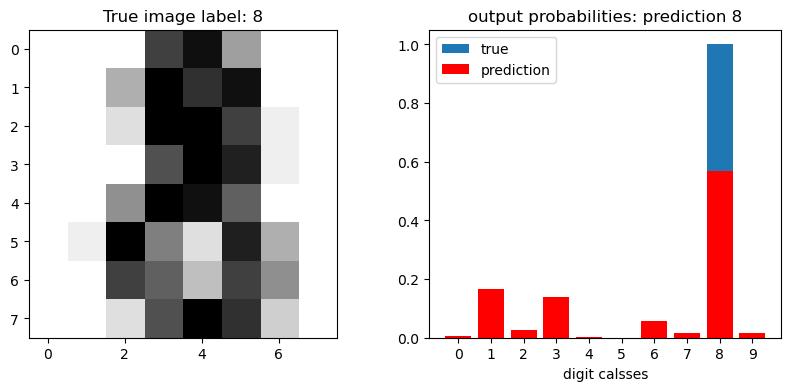

In [48]:
# evaluate the model on sample
plot_prediction(layer,100)

# NN with one hidden layer 
- the hidden layer will have sigmoid activation function

In [49]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

def sigmoid_gradient(z):
    sig_z = sigmoid(z)
    return sig_z * (1 - sig_z)

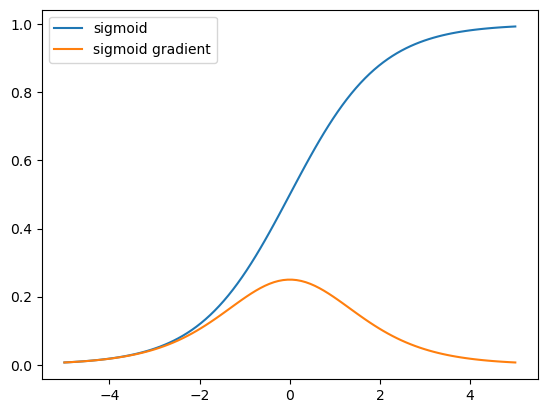

In [50]:
z = np.linspace(-5,5,100)
y1 = sigmoid(z)
y2 = sigmoid_gradient(z)
plt.plot(z,y1,label="sigmoid")
plt.plot(z,y2,label="sigmoid gradient")
plt.legend()

now we will implement a NN with 1 hidden sigmoid layer and 1 softmax layer

In [51]:
class NN():
    def __init__(self,input_size,hidden_size,output_size):
        self.w_h = np.random.uniform(size=(input_size,hidden_size),low = -0.1, high = 0.1)
        self.b_h = np.zeros(hidden_size)
        self.w_o = np.random.uniform(size=(hidden_size,output_size),low = -0.1, high = 0.1)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size
        
    def forward(self,x,keep_activations = False):
        z_h = np.dot(x,self.w_h) + self.b_h #pre-layer 1
        
        a_h = sigmoid(z_h)
        
        z_o = np.dot(a_h,self.w_o) + self.b_o
        
        a_o = softmax(z_o)
        
        if keep_activations: #used in back prop
            return a_o, a_h, z_h 
        else:
            return a_o
    def loss(self,x,y): #it will be categorical cross entropy
        y_prid = self.forward(x)
        y = one_hot(self.output_size,y)
        return categoricalcrossentropy(y,y_prid)
    
    def loss_gradient(self,x,y):
        a_o , a_h, z_h = self.forward(x,keep_activations=True)
        
        dloss_z_o = a_o - one_hot(self.output_size,y)
        dloss_w_o = np.outer(a_h, dloss_z_o)
        dloss_b_o = dloss_z_o
        
        #gradients of the hidden layer 
        dloss_a_h = np.dot(dloss_z_o,self.w_o.T)
        dloss_z_h = sigmoid_gradient(z_h) * dloss_a_h
        dloss_w_h = np.outer(x,dloss_z_h)
        dloss_b_h = dloss_z_h
        grads = {"w_o": dloss_w_o, "b_o": dloss_b_o,"w_h":dloss_w_h,"b_h":dloss_b_h}
        return grads
        
    def train(self,x,y,learning_rate):
        grads = self.loss_gradient(x,y)
        self.w_h = self.w_h - learning_rate * grads["w_h"]
        self.b_h = self.b_h - learning_rate * grads["b_h"]
        self.w_o = self.w_o - learning_rate * grads["w_o"]
        self.b_o = self.b_o - learning_rate * grads["b_h"]
    
    def predict(self,X): # this gets the corresponding class from y-prid vector
        y_prid = self.forward(X) #y_prid here is a vector for each patter
        return np.argmax(y_prid,axis = -1)
    
    def accuracy(self,X,y):
        y_prid = self.predict(X) #y_prid here will be scalar for each pattern (corresponding to the predicted class)
        return (y == y_prid).mean()
    
    

In [52]:
# use the NN
n_hidden = 10 #10 hidden units 
model = NN(input_size=n_features,hidden_size=n_hidden,output_size=n_classes)

In [53]:
print("evaluate the untrained model:")
train_loss = model.loss(X_train,y_train)
train_accuracy = model.accuracy(X_train,y_train)
test_accuracy = model.accuracy(X_test,y_test)
print(f"train loss: %0.4f , train accuracy: %0.3f , test accuracy: %0.3f "% (train_loss,train_accuracy,test_accuracy))

evaluate the untrained model:
train loss: 2.3152 , train accuracy: 0.096 , test accuracy: 0.107 


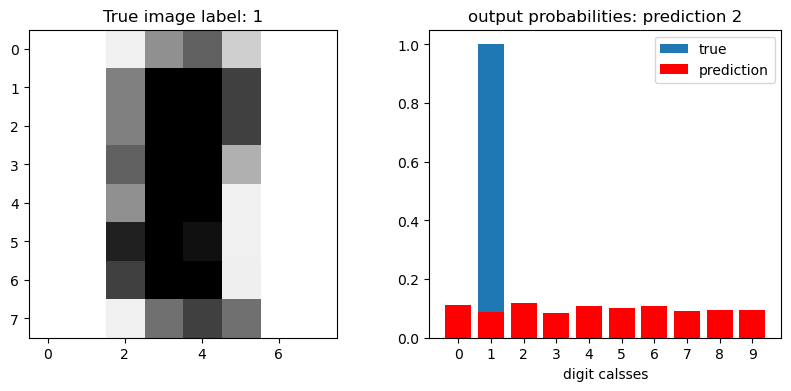

In [54]:
plot_prediction(model,5)

In [55]:
for epoch in range(15): #  we will have 15 training loops,each sees the whole traning data
    for i, (x,y) in enumerate(zip(X_train,y_train)):
        model.train(x,y,learning_rate) #train with single pattern
        # print the state every 100 example
    train_loss = model.loss(X_train,y_train)
    train_accuracy = model.accuracy(X_train,y_train)
    test_accuracy = model.accuracy(X_test,y_test)
    print(f"train loss: %0.4f , train accuracy: %0.3f , test accuracy: %0.3f "% (train_loss,train_accuracy,test_accuracy))

train loss: 2.0139 , train accuracy: 0.433 , test accuracy: 0.381 
train loss: 1.3784 , train accuracy: 0.719 , test accuracy: 0.674 
train loss: 0.9577 , train accuracy: 0.832 , test accuracy: 0.800 
train loss: 0.7037 , train accuracy: 0.888 , test accuracy: 0.867 
train loss: 0.5433 , train accuracy: 0.917 , test accuracy: 0.919 
train loss: 0.4340 , train accuracy: 0.942 , test accuracy: 0.930 
train loss: 0.3576 , train accuracy: 0.954 , test accuracy: 0.933 
train loss: 0.3034 , train accuracy: 0.962 , test accuracy: 0.937 
train loss: 0.2640 , train accuracy: 0.965 , test accuracy: 0.944 
train loss: 0.2344 , train accuracy: 0.968 , test accuracy: 0.948 
train loss: 0.2116 , train accuracy: 0.969 , test accuracy: 0.956 
train loss: 0.1934 , train accuracy: 0.973 , test accuracy: 0.956 
train loss: 0.1786 , train accuracy: 0.976 , test accuracy: 0.959 
train loss: 0.1663 , train accuracy: 0.976 , test accuracy: 0.959 
train loss: 0.1558 , train accuracy: 0.978 , test accuracy: 0.

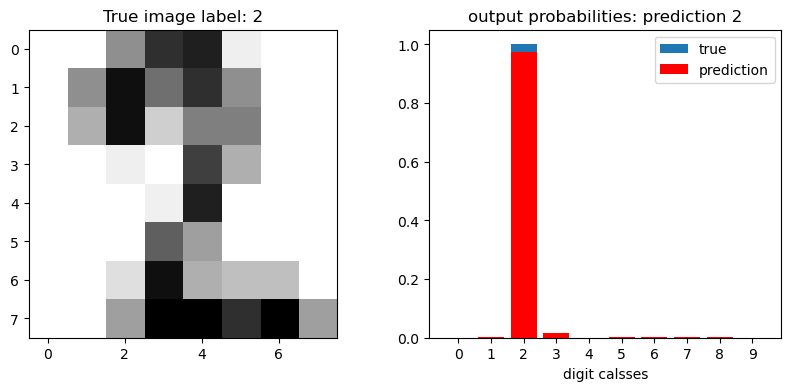

In [56]:
plot_prediction(model,8)

## assignment
1) get the samples that the model has predicted wrong 

2) apply the same architecture in keras

In [57]:
y_prid = model.predict(X_test)
y_prid = y_prid.astype('int32')
y_prid

array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1,
       9, 8, 0, 9, 8, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       0, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 1, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 8, 6, 5, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 7,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 7, 8, 8, 5, 8, 1, 4, 1, 2, 9, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 3, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 6, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 9, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 4, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 1, 4, 0, 1, 8, 6, 5, 0, 1, 6, 2, 4, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3,
       6, 0, 8, 6, 7, 6, 7, 9, 2, 6, 8, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 8, 9, 0])

In [58]:
y_test

array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1,
       9, 8, 0, 9, 8, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       6, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 8, 6, 8, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 4,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 7, 4, 8, 5, 8, 1, 4, 1, 2, 5, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 5, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 6, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 5, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 6, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 1, 4, 0, 8, 8, 6, 5, 0, 1, 6, 2, 0, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 9, 5, 3,
       6, 0, 8, 6, 7, 6, 7, 9, 2, 6, 8, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 8, 9, 0])

In [59]:
accuracy = (y_prid == y_test).sum() / len(y_test)
accuracy

0.9592592592592593

In [60]:
indicies = np.where(y_prid != y_test)[0]
indicies

array([ 44,  55,  69,  87,  99, 107, 121, 170, 180, 204, 212], dtype=int64)

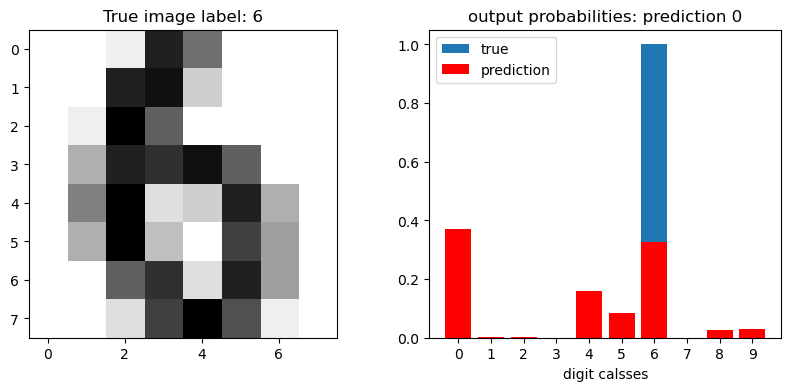

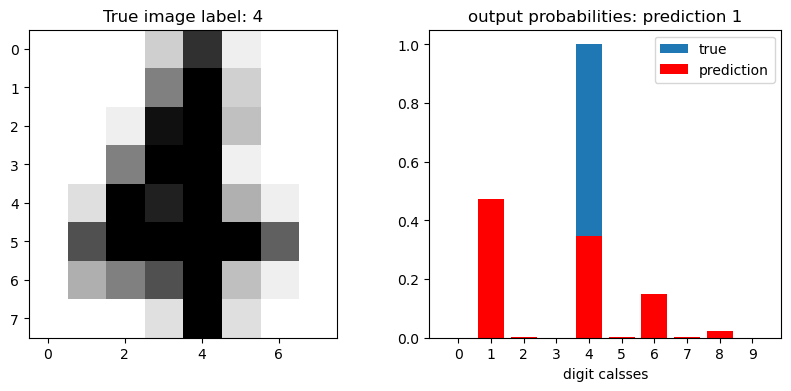

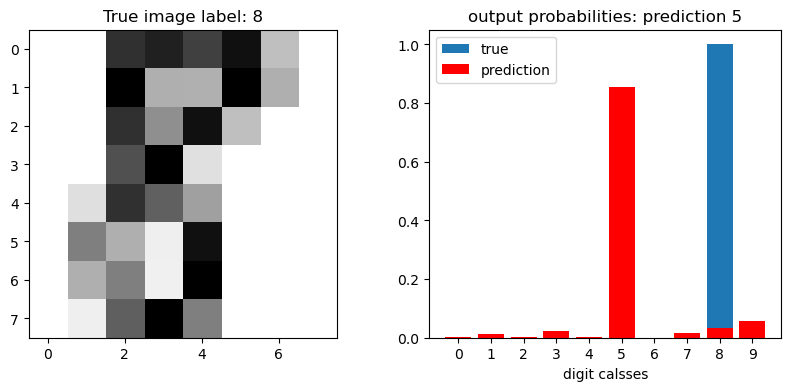

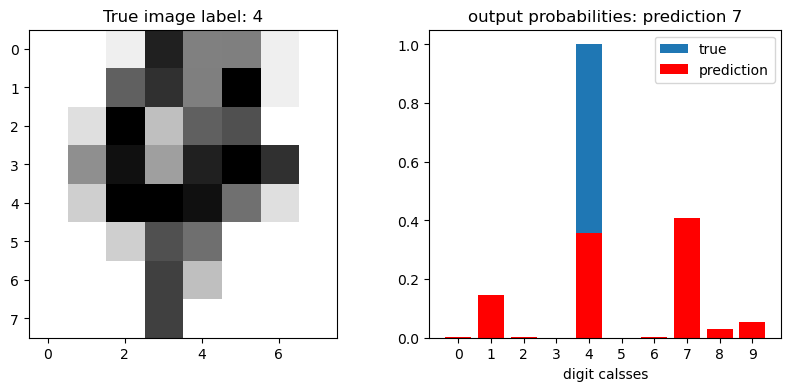

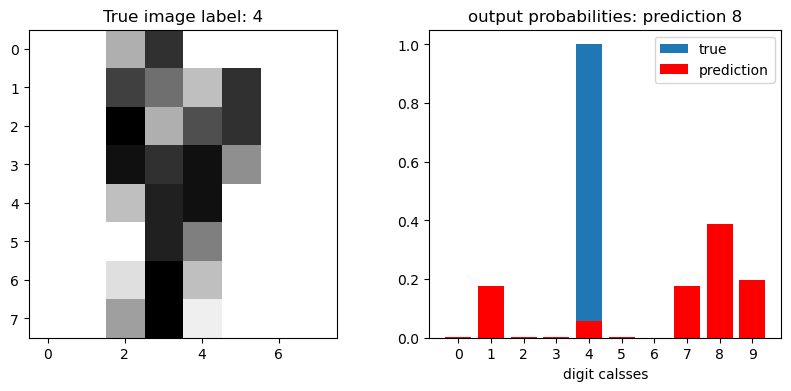

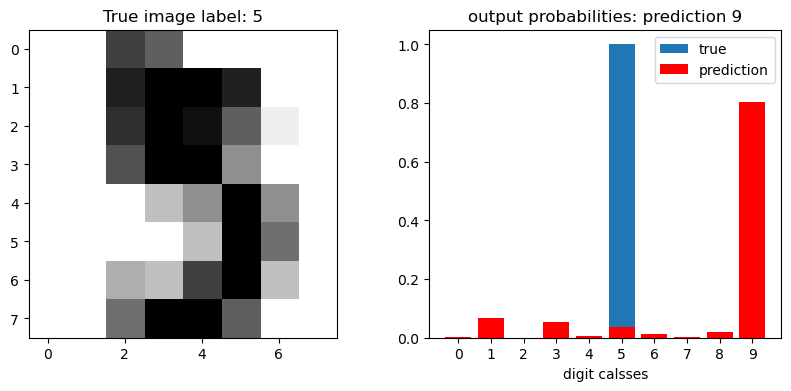

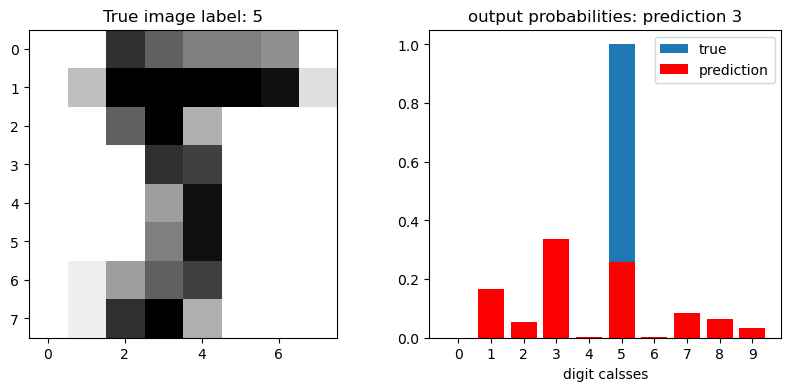

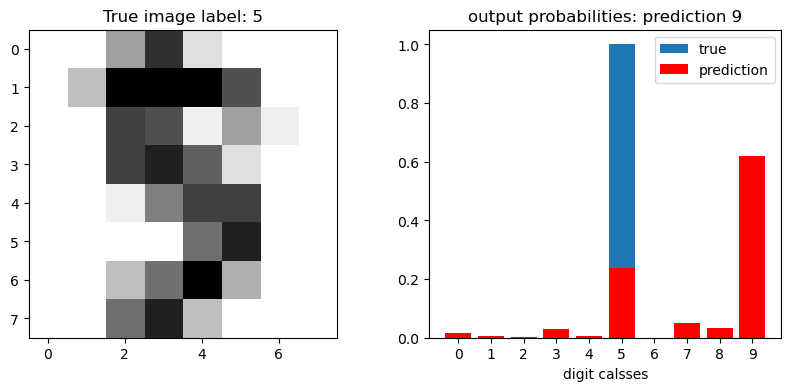

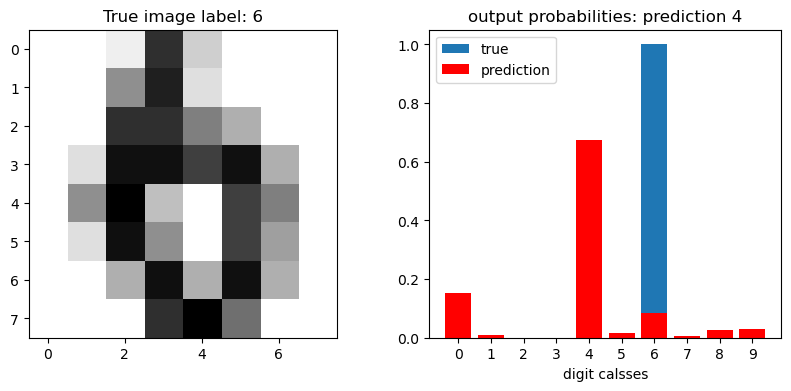

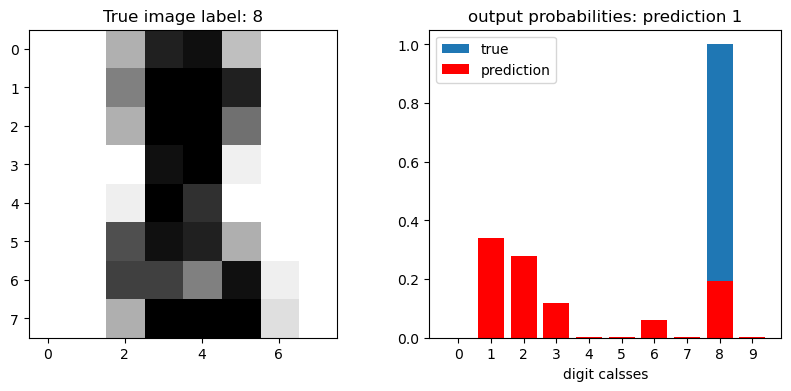

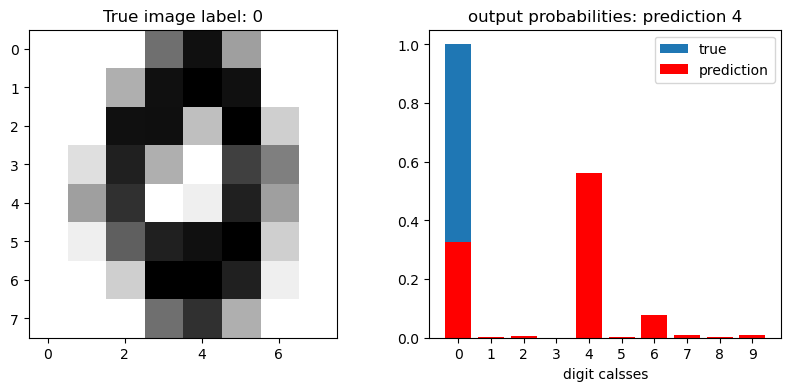

In [61]:
for index in indicies:
    plot_prediction(model,index)

## apply the same architecture in keras

In [62]:
import tensorflow as TF
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [63]:
y_train

array([2, 9, 5, ..., 9, 4, 1])

In [64]:
y_train_encoded = one_hot(10,y_train)
y_train_encoded = y_train_encoded.astype('int8')

In [65]:
y_train_encoded

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int8)

In [66]:
model = Sequential([
    Dense(n_hidden,activation='sigmoid',input_shape=((n_features,))),
    Dense(n_classes,activation='softmax')
])

In [67]:
model.compile(optimizer='sgd',loss='CategoricalCrossentropy')

In [68]:
X_train.shape,y_train.shape

((1527, 64), (1527,))

In [69]:
model.fit(X_train,y_train_encoded,epochs=300)

Epoch 1/300
48/48 [==============================] - 1s 3ms/step - loss: 2.3902
Epoch 2/300
48/48 [==============================] - 0s 3ms/step - loss: 2.3193
Epoch 3/300
48/48 [==============================] - 0s 3ms/step - loss: 2.2572
Epoch 4/300
48/48 [==============================] - 0s 3ms/step - loss: 2.2017
Epoch 5/300
48/48 [==============================] - 0s 3ms/step - loss: 2.1518
Epoch 6/300
48/48 [==============================] - 0s 3ms/step - loss: 2.1062
Epoch 7/300
48/48 [==============================] - 0s 3ms/step - loss: 2.0644
Epoch 8/300
48/48 [==============================] - 0s 3ms/step - loss: 2.0254
Epoch 9/300
48/48 [==============================] - 0s 3ms/step - loss: 1.9890
Epoch 10/300
48/48 [==============================] - 0s 3ms/step - loss: 1.9545
Epoch 11/300
48/48 [==============================] - 0s 3ms/step - loss: 1.9216
Epoch 12/300
48/48 [==============================] - 0s 3ms/step - loss: 1.8902
Epoch 13/300
48/48 [=================

48/48 [==============================] - 0s 3ms/step - loss: 0.6503
Epoch 103/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6444
Epoch 104/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6387
Epoch 105/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6330
Epoch 106/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6274
Epoch 107/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6219
Epoch 108/300
48/48 [==============================] - 0s 4ms/step - loss: 0.6164
Epoch 109/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6111
Epoch 110/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6058
Epoch 111/300
48/48 [==============================] - 0s 3ms/step - loss: 0.6006
Epoch 112/300
48/48 [==============================] - 0s 3ms/step - loss: 0.5954
Epoch 113/300
48/48 [==============================] - 0s 4ms/step - loss: 0.5904
Epoch 114/300
48/48 [=========

48/48 [==============================] - 0s 4ms/step - loss: 0.3247
Epoch 203/300
48/48 [==============================] - 0s 3ms/step - loss: 0.3230
Epoch 204/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3213
Epoch 205/300
48/48 [==============================] - 0s 3ms/step - loss: 0.3197
Epoch 206/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3180
Epoch 207/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3164
Epoch 208/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3147
Epoch 209/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3131
Epoch 210/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3115
Epoch 211/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3100
Epoch 212/300
48/48 [==============================] - 0s 5ms/step - loss: 0.3084
Epoch 213/300
48/48 [==============================] - 0s 4ms/step - loss: 0.3068
Epoch 214/300
48/48 [=========

In [70]:
y_prid = model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [71]:
y_prid.shape

(270, 10)

In [72]:
y_prid = np.argmax(y_prid,axis=1)

In [73]:
y_prid = y_prid.astype('int32')
y_prid

array([2, 4, 7, 9, 1, 1, 5, 6, 2, 5, 0, 2, 0, 5, 4, 8, 7, 0, 3, 6, 8, 1,
       9, 8, 0, 9, 9, 4, 2, 7, 5, 4, 2, 8, 6, 9, 6, 1, 8, 6, 5, 7, 8, 1,
       6, 5, 0, 1, 9, 4, 8, 5, 3, 9, 3, 4, 4, 6, 7, 5, 4, 0, 3, 8, 1, 2,
       6, 3, 6, 5, 1, 7, 4, 7, 4, 1, 7, 0, 8, 8, 5, 2, 0, 3, 7, 4, 2, 7,
       6, 0, 6, 0, 8, 3, 6, 7, 3, 0, 9, 1, 8, 5, 8, 1, 4, 1, 2, 9, 1, 4,
       8, 9, 9, 0, 9, 5, 6, 8, 2, 1, 4, 3, 3, 8, 7, 0, 4, 2, 1, 1, 5, 2,
       5, 6, 9, 1, 2, 7, 6, 0, 9, 2, 1, 8, 8, 2, 1, 4, 2, 4, 1, 5, 9, 3,
       3, 4, 1, 2, 2, 5, 6, 0, 7, 9, 6, 8, 6, 1, 1, 3, 9, 2, 0, 9, 0, 2,
       2, 8, 0, 7, 6, 0, 8, 5, 3, 9, 5, 7, 9, 9, 8, 0, 7, 1, 8, 4, 7, 7,
       4, 0, 8, 9, 4, 0, 8, 8, 6, 5, 0, 1, 6, 2, 4, 4, 7, 5, 3, 7, 3, 4,
       5, 9, 9, 7, 3, 4, 5, 8, 1, 1, 9, 5, 5, 1, 4, 1, 2, 9, 2, 0, 5, 3,
       6, 0, 8, 6, 7, 6, 7, 5, 2, 6, 8, 3, 2, 8, 5, 5, 4, 2, 2, 5, 0, 5,
       2, 8, 8, 8, 9, 0])

In [74]:
accuracy = (y_prid == y_test).sum() / len(y_test)
accuracy

0.9481481481481482

In [75]:
indicies = np.where(y_prid != y_test)[0]
indicies

array([ 26,  67,  69,  87,  98,  99, 107, 121, 143, 170, 201, 212, 239,
       249], dtype=int64)

In [76]:
model.predict( np.array( [X_test[0],] )  )

1/1 [==============================] - 0s 16ms/step


array([[1.14349205e-04, 1.04730437e-02, 9.42429245e-01, 2.26824656e-02,
        3.24402754e-05, 1.04384276e-03, 2.57848471e-04, 3.42644798e-03,
        8.49282648e-03, 1.10474741e-02]], dtype=float32)

In [77]:
def plot_prediction_keras(model,sample_index = 0,classes = range(10)):
    fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    # ax0 is for plotting the test
    x = [X_test[sample_index]]
    x = scalar.inverse_transform(x) # denormalize it to print it
    ax0.imshow(x.reshape(8,8),cmap = plt.cm.gray_r,interpolation='nearest')
    ax0.set_title("True image label: %d"%(y_test[sample_index]))
    
    y = one_hot(len(classes), y_test[sample_index])
    ax1.bar(classes,y,label="true")
    y_prid = model.predict( np.array( [X_test[sample_index],] )  )[0]
    y_prid = y_prid.astype('float64')
    ax1.bar(classes,y_prid,label='prediction',color='red')
    
    prediction = np.argmax(y_prid)
    ax1.set_title("output probabilities: prediction %d"%(prediction))
    ax1.legend()
    ax1.set_xticks(classes)
    ax1.set_xlabel("digit calsses")

1/1 [==============================] - 0s 31ms/step


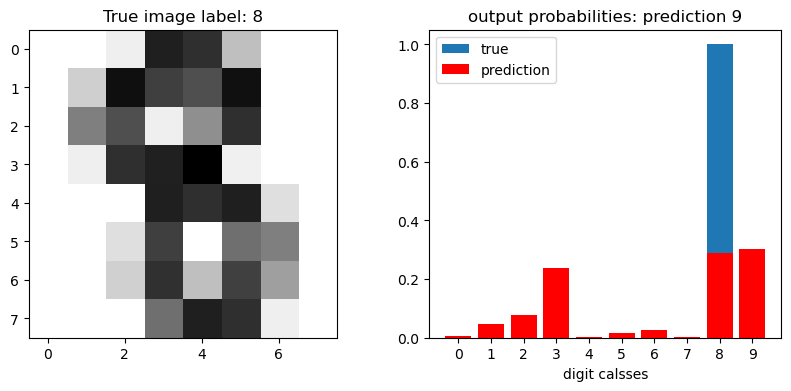

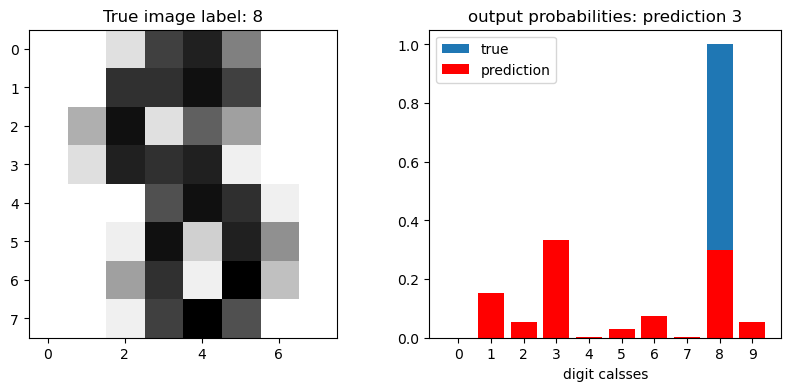

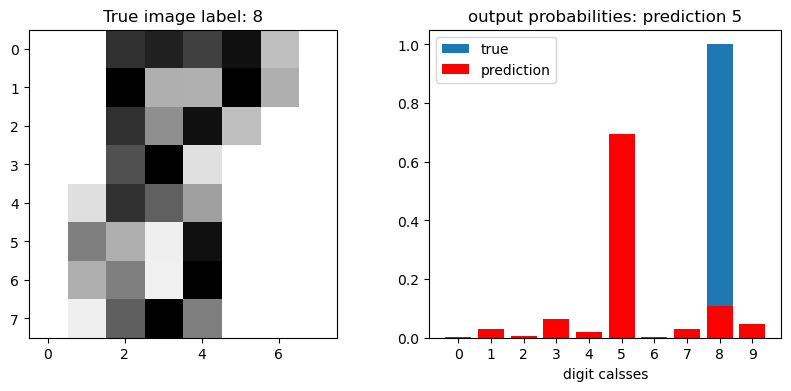

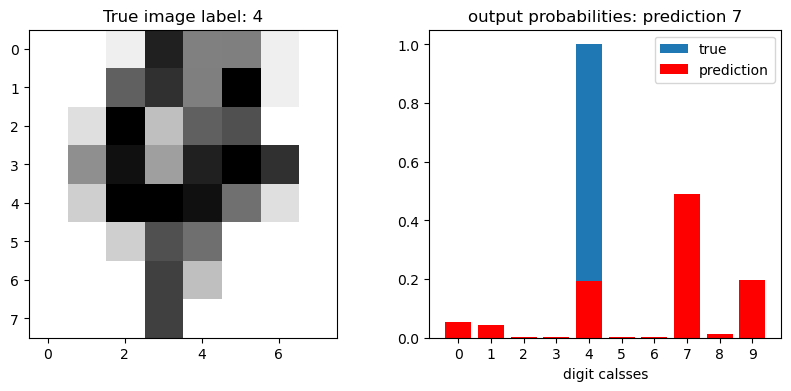

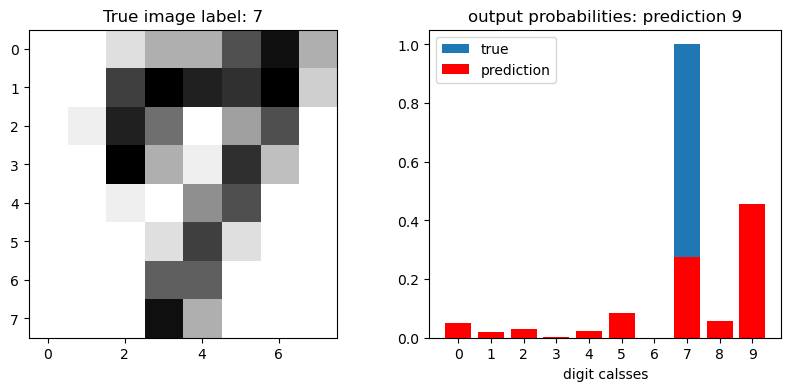

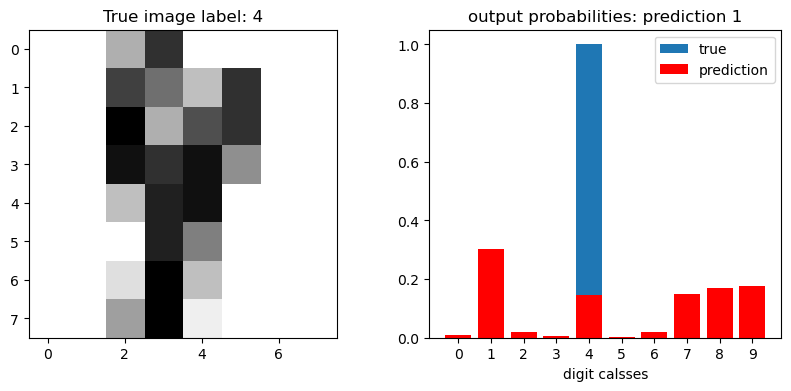

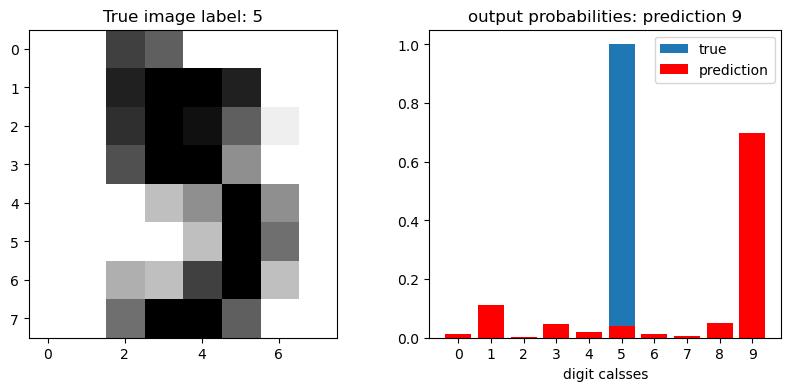

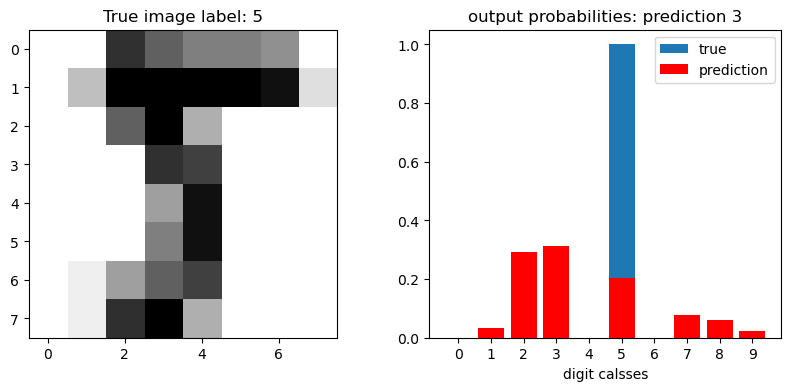

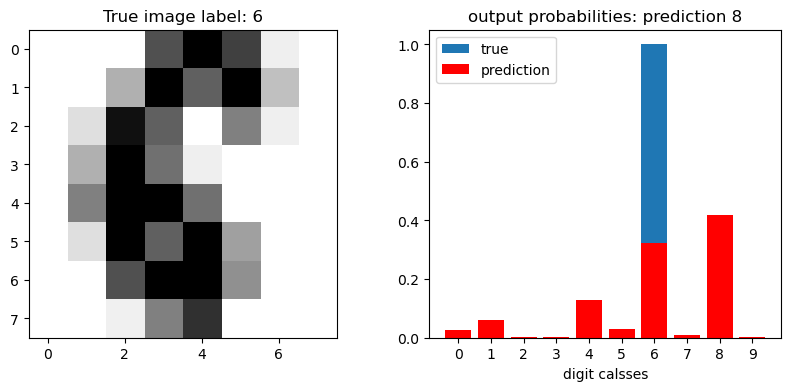

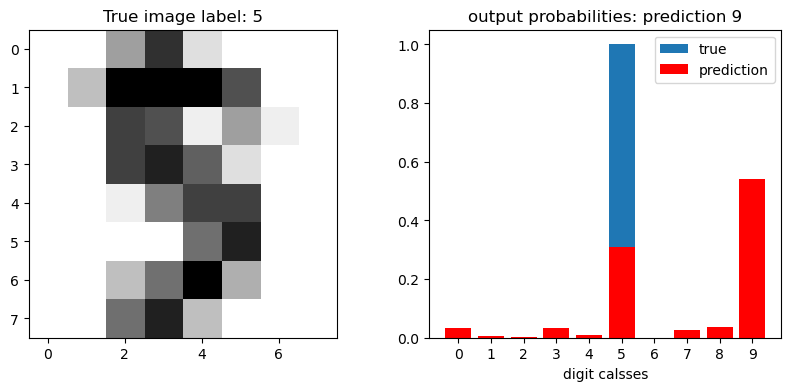

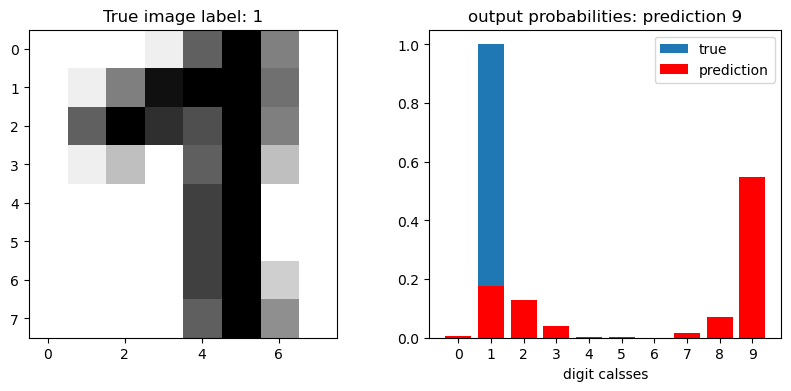

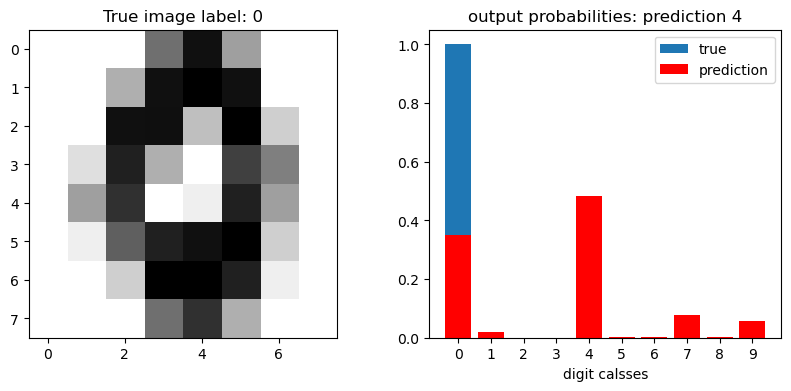

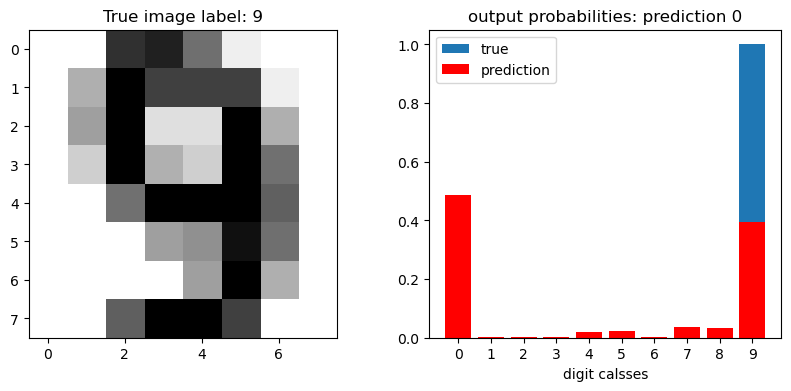

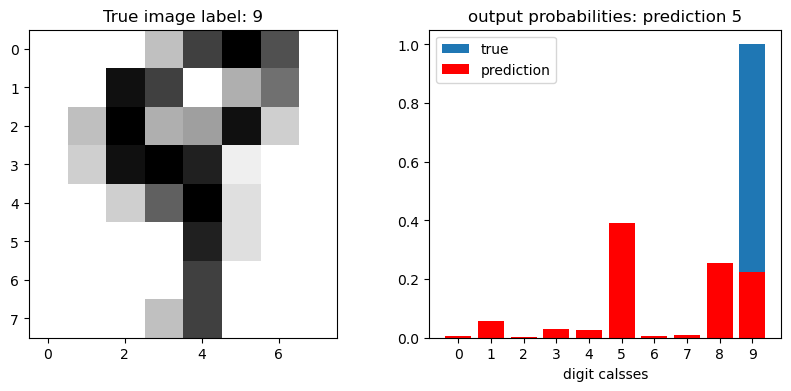

In [78]:
for index in indicies:
    plot_prediction_keras(model,index)